# Compound grading for blockMesh

## Setting the expansion Ratio of cells in blockMesh

$R$ is the final to first cell size ratio. 
$r$ is the first to second expansion ratio.
$n$ is the number of cells.
$\delta x_s$ is the smallest cell size.
$l$ is the total length. Then
$$r = R^{\frac{1}{n-1}} = \frac{l-\delta x_s}{l - (R \times \delta x_s)}$$
$$\delta x_s = l \frac{r-1}{\alpha r - 1}$$
and
$$ \alpha = R \ for \ R>1$$

\begin{equation*}
	\alpha = 1-r^{-n} + r^{-1} \ for \ R<1
\end{equation*}


$$n = \frac{\ln R}{\ln r}+1$$

Setting the double expansion ratio given as

(0.05 0.11 10)    // 5% x-dir, 11% cells, expansion = 10 

(0.90 0.78 1.0)    // 90% x-dir, 78% cells, expansion = 1 

(0.05 0.11 0.1) // 5% x-dir, 11% cells, expansion = 0.1 (1/10) 

In [3]:
import numpy as np
def getNumberOfCellsAndExpansionRatio(L,xmin,xmax):
    """ Get number of cells and expansion ratio given the Length of domain, min and max cell size """

#   FirstToLastCellExpansionRatio
    R = xmax/xmin
    
#   CellToCellExpansionRatio
    r = (L-xmin)/(L-(xmin*R))
    
#   Number of cells
    if xmin==xmax:
        N = np.ceil(L/xmin)
    else:
        N = np.ceil(np.log(R)/np.log(r) + 1)
    
    return N, R, r

In [46]:
import numpy as np
from scipy.optimize import fsolve
def getExpansionRatioFromCellsAndLength(L,xmin,N):
    """ Get expansion ratio given the Length of domain, number of cells, and min cell size """

    def func(R):
        return  np.log(R)/np.log((L-xmin)/(L-(xmin*R))) + 1 - N
    
    R = fsolve(func, 1.01)
    r = R**(1/(N-1))
    return R, r

R,r = getExpansionRatioFromCellsAndLength(50,1,20)
print ("R",R)

def setFormat(x,formatIn=".3f"):
    return str('{0:'+formatIn+'}').format(x)

x = 0.356536
print("x", setFormat(x))
print("x", setFormat(x, formatIn=".1f"))

R [4.961311]
x 0.357
x 0.4


In [39]:
## Three different gradings, also possible to have same grading for two sections
#                      |-----|---------|----|
# cell size:           x1    x2        x3   x4
# cell total length    |<--------L--------->|
# start,centre, end L  | Ls  |  Lc     | Le |  
x1 = 50e-5
x2 = 30e-5
x3 = 5e-5
x4 = 3.5e-5

# lenght of cell
L = 24e-3

# start section length
Ls = L*50/100
# end section length
Le = L*10/100
# centre section length
Lc = L-Ls-Le

print("L", '{0:.4f}'.format(L), "Ls", '{0:.4f}'.format(Ls), "Lc", '{0:.4f}'.format(Lc), "Le", '{0:.4f}'.format(Le))

# find cell count and expansion ratio for Ls
Ns, Rs, rs = getNumberOfCellsAndExpansionRatio(Ls,x1,x2)
print ("Ns = start cells:", '{0:.0f}'.format(Ns), ";", "rs = start expansion ratio:", '{0:.3f}'.format(rs), ";", "Rs:", '{0:.3f}'.format(Rs))

# find cell count and expansion ratio for Lc
Nc, Rc, rc = getNumberOfCellsAndExpansionRatio(Lc,x2,x3)
print ("Nc = centre cells:", '{0:.0f}'.format(Nc), ";", "rc = centre expansion ratio:", '{0:.3f}'.format(rc), ";", "Rs:", '{0:.3f}'.format(Rc))

# find cell count and expansion ratio for Le
Ne, Re, re = getNumberOfCellsAndExpansionRatio(Le,x3,x4)
print ("Ne = end cells:", '{0:.0f}'.format(Ne), ";", "re = end expansion ratio:", '{0:.3f}'.format(re), ";", "Re:", '{0:.3f}'.format(Re))

# total cells
Nt = Ns + Nc + Ne # for full edge
print ("Nt = Total Cells:", setFormat(Nt, formatIn=".0f"))

cellRatioStartCenterEnd = [setFormat(Ns/Nt), setFormat(Nc/Nt), setFormat(Ne/Nt)]
print ("Cell Ratio (Start Centre End ) =", "(",', '.join(map(str, cellRatioStartCenterEnd)) , ")")

lengthRatioStartCenterEnd = [setFormat(Ls/L), setFormat(Lc/L), setFormat(Le/L)]
print ("Length Ratio (Left Center Right ) =", "(",', '.join(map(str, lengthRatioStartCenterEnd)) , ")")

print ("Final grading for cell edge")

print ( "(\n",  " (", setFormat(Ls/L), " ", setFormat(Ns/Nt),  " ",  setFormat(Rs),      ")", "\n", \
              " (", setFormat(Lc/L), " ", setFormat(Nc/Nt),   " ",  setFormat(Rc),     ")", "\n", \
              " (", setFormat(Le/L), " ", setFormat(Ne/Nt),  " ",   setFormat(Re),     ")","\n",")")

L 0.0240 Ls 0.0120 Lc 0.0096 Le 0.0024
Ns = start cells: 31 ; rs = start expansion ratio: 0.983 ; Rs: 0.600
Nc = centre cells: 69 ; rc = centre expansion ratio: 0.974 ; Rs: 0.167
Ne = end cells: 58 ; re = end expansion ratio: 0.994 ; Re: 0.700
Nt = Total Cells: 158
Cell Ratio (Start Centre End ) = ( 0.196, 0.437, 0.367 )
Length Ratio (Left Center Right ) = ( 0.500, 0.400, 0.100 )
Final grading for cell edge
(
  ( 0.500   0.196   0.600 ) 
  ( 0.400   0.437   0.167 ) 
  ( 0.100   0.367   0.700 ) 
 )


In [36]:
## Three different gradings, also possible to have same grading for two sections
#                      |-----|---------|----|
# cell size:           x1    x2        x3   x4
# cell total length    |<--------L--------->|
# start,centre, end L  | Ls  |  Lc     | Le |  
x1 = 3.5e-5
x2 = 3.5e-5
x3 = 25e-5
x4 = 50e-5

# lenght of cell
L = 20e-3

# start section length
Ls = L*50/100
# end section length
Le = L*25/100
# centre section length
Lc = L-Ls-Le

print("L", '{0:.4f}'.format(L), "Ls", '{0:.4f}'.format(Ls), "Lc", '{0:.4f}'.format(Lc), "Le", '{0:.4f}'.format(Le))

# find cell count and expansion ratio for Ls
Ns, Rs, rs = getNumberOfCellsAndExpansionRatio(Ls,x1,x2)
print ("Ns = start cells:", '{0:.0f}'.format(Ns), ";", "rs = start expansion ratio:", '{0:.3f}'.format(rs), ";", "Rs:", '{0:.3f}'.format(Rs))

# find cell count and expansion ratio for Lc
Nc, Rc, rc = getNumberOfCellsAndExpansionRatio(Lc,x2,x3)
print ("Nc = centre cells:", '{0:.0f}'.format(Nc), ";", "rc = centre expansion ratio:", '{0:.3f}'.format(rc), ";", "Rs:", '{0:.3f}'.format(Rc))

# find cell count and expansion ratio for Le
Ne, Re, re = getNumberOfCellsAndExpansionRatio(Le,x3,x4)
print ("Ne = end cells:", '{0:.0f}'.format(Ne), ";", "re = end expansion ratio:", '{0:.3f}'.format(re), ";", "Re:", '{0:.3f}'.format(Re))

# total cells
Nt = Ns + Nc + Ne # for full edge
print ("Nt = Total Cells:", setFormat(Nt, formatIn=".0f"))

cellRatioStartCenterEnd = [setFormat(Ns/Nt), setFormat(Nc/Nt), setFormat(Ne/Nt)]
print ("Cell Ratio (Start Centre End ) =", "(",', '.join(map(str, cellRatioStartCenterEnd)) , ")")

lengthRatioStartCenterEnd = [setFormat(Ls/L), setFormat(Lc/L), setFormat(Le/L)]
print ("Length Ratio (Left Center Right ) =", "(",', '.join(map(str, lengthRatioStartCenterEnd)) , ")")

print ("Final grading for cell edge")

print ( "(\n",  " (", setFormat(Ls/L), " ", setFormat(Ns/Nt),  " ",  setFormat(Rs),      ")", "\n", \
              " (", setFormat(Lc/L), " ", setFormat(Nc/Nt),   " ",  setFormat(Rc),     ")", "\n", \
              " (", setFormat(Le/L), " ", setFormat(Ne/Nt),  " ",   setFormat(Re),     ")","\n",")")

L 0.0200 Ls 0.0100 Lc 0.0050 Le 0.0050
Ns = start cells: 286 ; rs = start expansion ratio: 1.000 ; Rs: 1.000
Nc = centre cells: 46 ; rc = centre expansion ratio: 1.045 ; Rs: 7.143
Ne = end cells: 14 ; re = end expansion ratio: 1.056 ; Re: 2.000
Nt = Total Cells: 346
Cell Ratio (Start Centre End ) = ( 0.827, 0.133, 0.040 )
Length Ratio (Left Center Right ) = ( 0.500, 0.250, 0.250 )
Final grading for cell edge
(
  ( 0.500   0.827   1.000 ) 
  ( 0.250   0.133   7.143 ) 
  ( 0.250   0.040   2.000 ) 
 )


## Visualizing results using blockMesh
See the attached folder "compoundGradedMesh" edit system/blockMeshDict and run
blockMesh (requires workiing openfoam installation, Tested on version 5.0). The resulting grid is shown below 
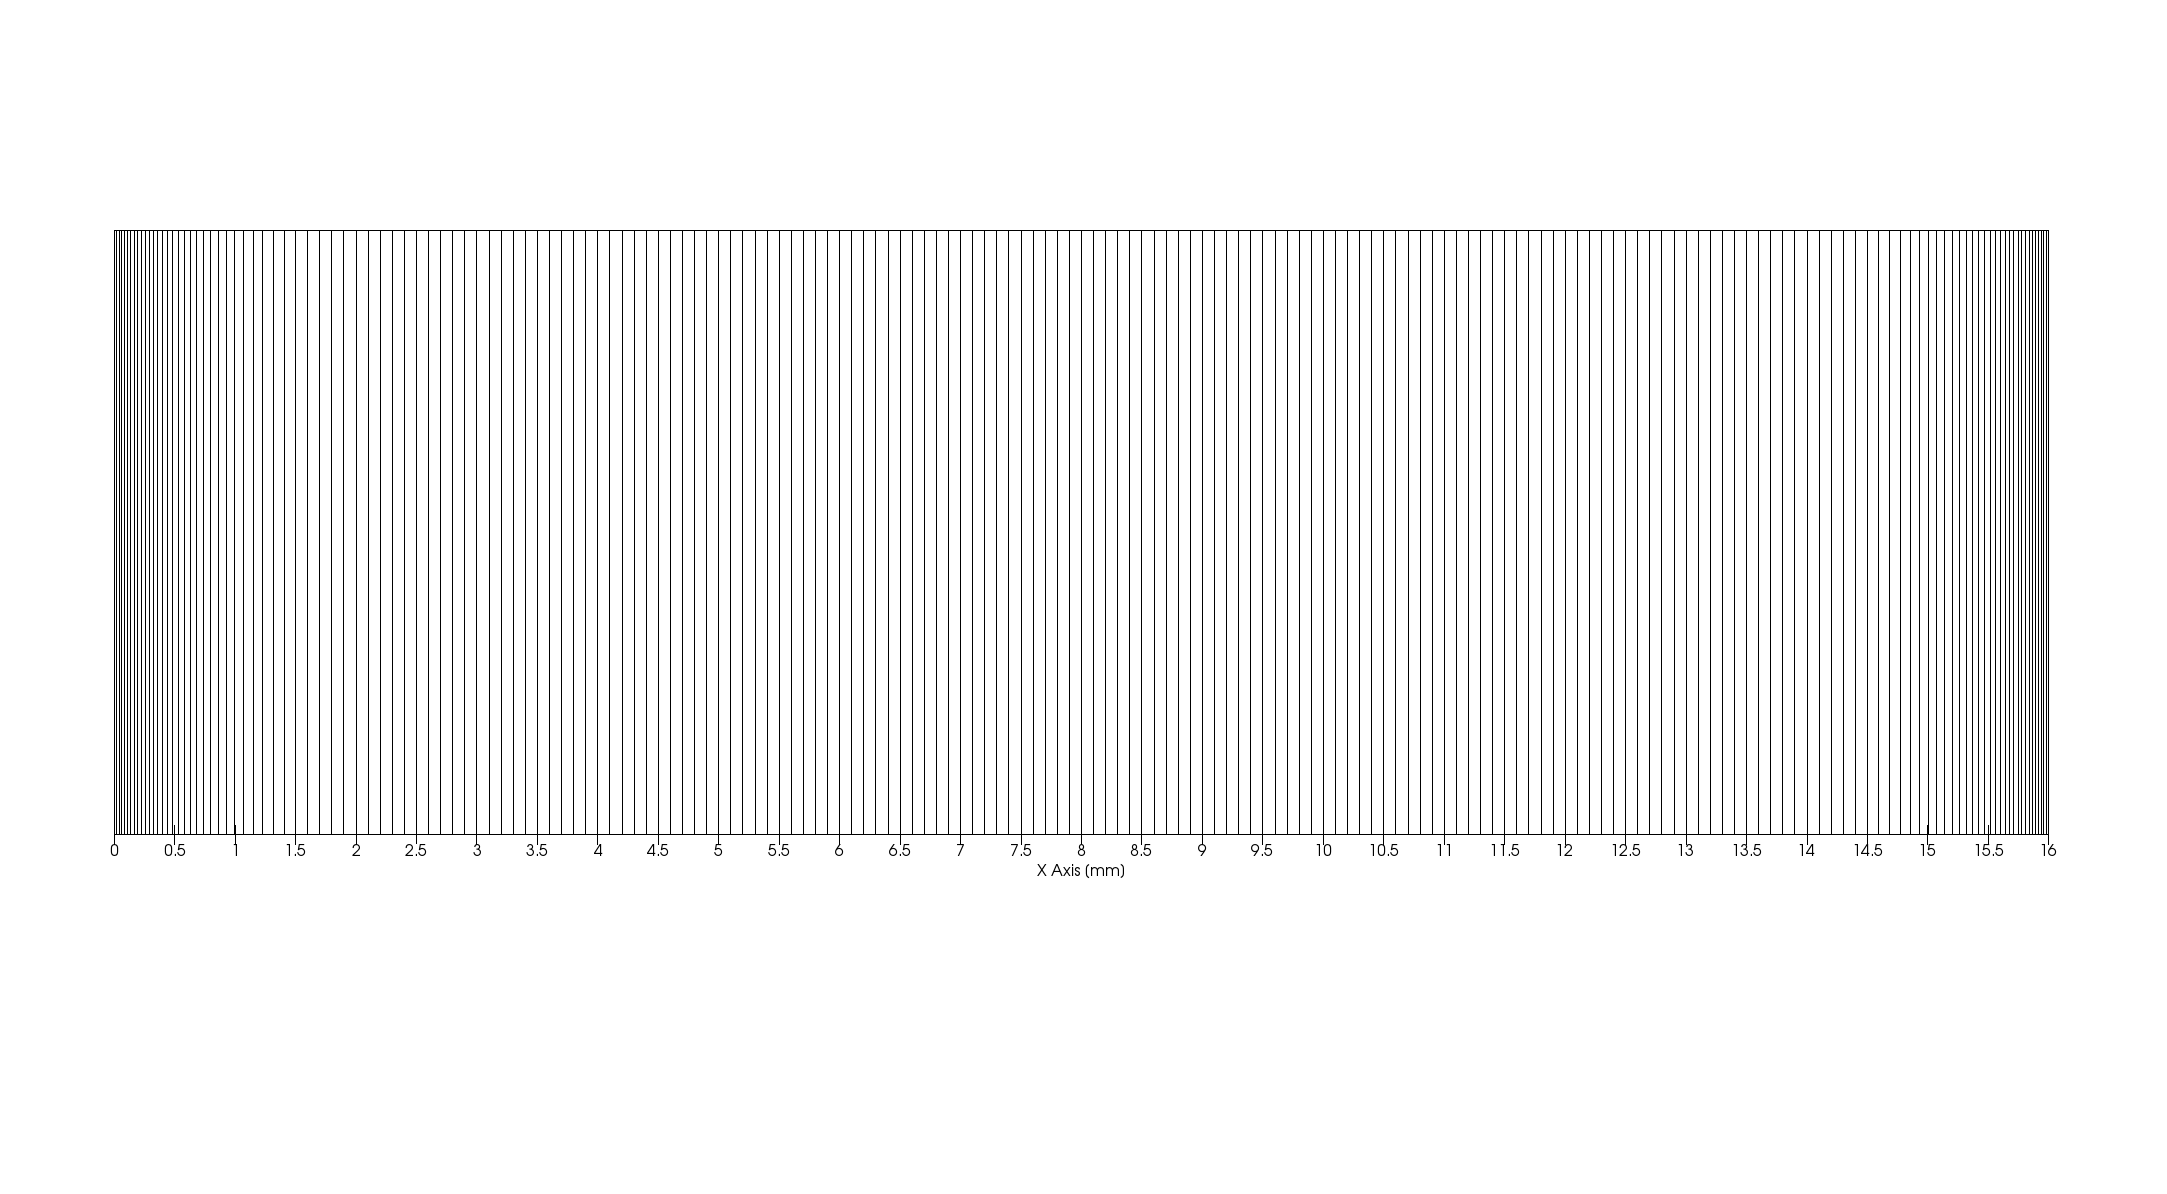
